In [4]:
import pandas as pd
import sqlite3
import numpy as np
from tqdm import tqdm
from dadata import Dadata

In [5]:
token = "197b8b690746d810261f23b9a79b632abdb28e7d"
dadata = Dadata(token)

con = sqlite3.connect("data/okved_20230329.sqlite3")
cur = con.cursor()

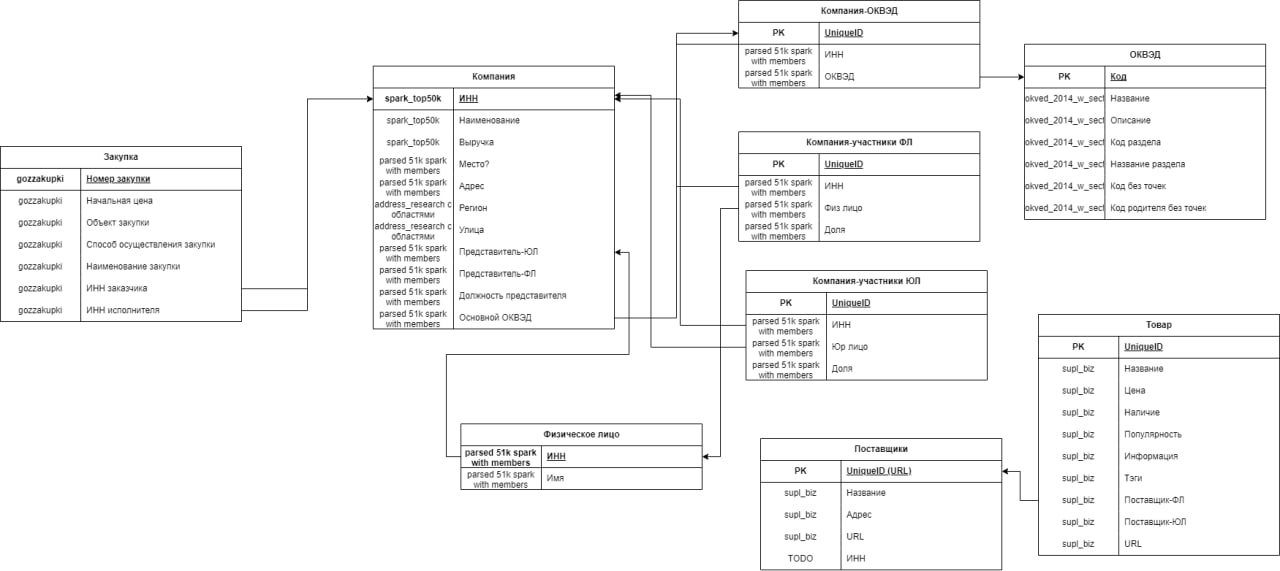

In [6]:
# Закупка - procurement
# Компания-участники ЮЛ - company_to_legal_member
# Компания-участники ФЛ - company_to_natural_member
# Компании-ОКВЕД - company_to_okved 
# Компания - legal_entity
# ОКВЕД - okved
# Поставщики - supplier
# Физическое лицо - natural_person
# Товар - product

In [7]:
def read(sql):
    return pd.read_sql(sql, con) # для удобства

In [8]:
sql = '''
    SELECT * FROM legal_entity
'''

In [9]:
comps = read(sql)

In [10]:
sql = '''
    SELECT * FROM supplier
'''

In [11]:
sups = read(sql)

In [7]:
len(comps)

66818

In [7]:
comps.address.isna().sum() / len(comps)

0.20138286090574395

In [8]:
comps.address[0]

'115035, ГОРОД МОСКВА, НАБ. СОФИЙСКАЯ, Д.26/1'

In [8]:
addresses = comps.address[comps.address.notna()].values

In [9]:
len(addresses)

53362

In [48]:
result = dadata.suggest("address", "115035, ГОРОД МОСКВА, НАБ. СОФИЙСКАЯ, Д.26/1", count=1)

In [54]:
res = result[0]
res['data']['geo_lat'], res['data']['geo_lon'] 

('55.746958', '37.620151')

In [8]:
18500 + 9500

28000

In [10]:
address_info = []
for i in tqdm(range(48000, len(addresses))):
    info = dadata.suggest("address", addresses[i], count=1)
    address_info.append(info)

100%|██████████████████████████████████████████████████████████████████████████████| 5362/5362 [02:40<00:00, 33.31it/s]


In [9]:
len(address_info)

1296

In [11]:
pd.DataFrame(address_info).to_csv('data/48000-.csv', index=False)

In [12]:
pd.read_csv('data/48000-.csv')

,0
0,"{'value': 'г Казань, ул Бирюзовая', 'unrestric..."
1,"{'value': 'г Москва, ул Аэродромная, д 12 к 2'..."
2,"{'value': 'г Москва, ул 2-я Мелитопольская, д ..."
3,"{'value': 'Новгородская обл, Новгородский р-н,..."
4,"{'value': 'Ивановская обл, г Приволжск, ул Вол..."
...,...
5357,"{'value': 'Свердловская обл, г Каменск-Уральск..."
5358,"{'value': 'г Санкт-Петербург, ул Парадная, д 8..."
5359,"{'value': 'Краснодарский край, г Анапа, Пионер..."
5360,"{'value': 'г Новосибирск, ул Кирова, д 82', 'u..."


In [13]:
df1 = pd.read_csv('data/0-9000.csv')
df2 = pd.read_csv('data/9000-18500.csv')
df3 = pd.read_csv('data/18500-28000.csv')
df4 = pd.read_csv('data/28000-38000.csv')
df5 = pd.read_csv('data/38000-48000.csv')
df6 = pd.read_csv('data/48000-.csv')

In [33]:
df = pd.concat([df1,df2,df3,df4,df5,df6]).reset_index(drop = True)

In [34]:
df

,0
0,"{'value': 'г Москва, Софийская наб, д 26/1', '..."
1,"{'value': 'г Санкт-Петербург, Лахтинский пр-кт..."
2,NaN
3,"{'value': 'г Москва, Сретенский б-р, д 11', 'u..."
4,"{'value': 'г Москва, ул Новая Басманная, д 2/1..."
...,...
53357,"{'value': 'Свердловская обл, г Каменск-Уральск..."
53358,"{'value': 'г Санкт-Петербург, ул Парадная, д 8..."
53359,"{'value': 'Краснодарский край, г Анапа, Пионер..."
53360,"{'value': 'г Новосибирск, ул Кирова, д 82', 'u..."


In [35]:
df.to_csv('data/full.csv', index=False)

In [14]:
embs = np.load('data/emb_np.npy', allow_pickle=True)

In [16]:
len(embs)

53362

In [19]:
comps_adr = comps[~comps.address.isna()]

In [20]:
comps_adr['emb'] = embs

C:\Users\nicol\AppData\Local\Temp\ipykernel_11676\1101737286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps_adr['emb'] = embs


In [23]:
comps_adr[~comps_adr['emb'].isna()]

,inn,name,revenue,location,address,region,street,post,natural_representative_inn,legal_representative_inn,main_okved_code,emb
0,7706107510,"ПАО ""НК ""РОСНЕФТЬ""",8.000000e+12,ГОРОД МОСКВА,"115035, ГОРОД МОСКВА, НАБ. СОФИЙСКАЯ, Д.26/1",МОСКВА,НАБ СОФИЙСКАЯ,ГЛАВНЫЙ ИСПОЛНИТЕЛЬНЫЙ\nДИРЕКТОР,770370393938,None,06.10.1,"[0.0021982712, 0.0025602274, 0.004451619, 0.00..."
1,7736050003,"ПАО ""ГАЗПРОМ""",6.000000e+12,Г.Санкт-Петербург,"197229, Г.Санкт-Петербург, ВН.ТЕР.Г. МУНИЦИПАЛ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ ЛАХТИНСКИЙ,ПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,782506133697,None,46.71,"[0.005155264, 0.0012874127, 0.0076143104, 0.00..."
3,7708004767,"ПАО ""ЛУКОЙЛ""",2.000000e+12,ГОРОД МОСКВА,"101000, ГОРОД МОСКВА, Б-Р СРЕТЕНСКИЙ, Д.11",МОСКВА,Б-Р СРЕТЕНСКИЙ,ПРЕЗИДЕНТ,770300105713,None,71.12.3,"[0.0027381002, 0.0022334736, 0.004270247, 0.00..."
4,7708503727,"ОАО ""РЖД""",2.000000e+12,Г.Москва,"107174, Г.Москва, ВН.ТЕР.Г. МУНИЦИПАЛЬНЫЙ ОКРУ...",МОСКВА,УЛ НОВАЯ БАСМАННАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР-\nПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,781306504007,None,49.20,"[0.0025980012, 0.0022231229, 0.004554158, 0.00..."
6,7825706086,"ООО ""АГРОТОРГ""",2.000000e+12,ГОРОД САНКТ-ПЕТЕРБУРГ,"191025, ГОРОД САНКТ-ПЕТЕРБУРГ, ПР-КТ НЕВСКИЙ, ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ НЕВСКИЙ,None,None,7728632689,47.19,"[0.0045283777, 0.0014587305, 0.0014842371, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
66796,7721045804,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВ...,NaN,"109443, Г.Москва, ПР-КТ ВОЛГОГРАДСКИЙ, дом Д.9...","109443, Г.Москва, ПР-КТ ВОЛГОГРАДСКИЙ, дом Д.9...",None,None,None,None,None,None,"[0.0017474543, 0.0030694979, 0.00827451, 0.005..."
66797,7802160210,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,NaN,"194291, ГОРОД САНКТ-ПЕТЕРБУРГ, ПР-КТ ЛУНАЧАРСК...","194291, ГОРОД САНКТ-ПЕТЕРБУРГ, ПР-КТ ЛУНАЧАРСК...",ГОРОД САНКТ-ПЕТЕРБУРГ,None,None,None,None,None,"[0.0038066802, 0.002574427, 0.003944216, 0.004..."
66804,5024076350,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""СПЕЦИАЛЬНОЕ КОНСТРУКТОРС...",NaN,"143432, Г.. КРАСНОГОРСК, УЛ. ИНСТИТУТСКАЯ, РП....","143432, Г.. КРАСНОГОРСК, УЛ. ИНСТИТУТСКАЯ, РП....",None,None,None,None,None,None,"[0.0027240096, 0.00618404, 0.001858598, 0.0020..."
66809,5321166230,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""АВТОБУСНЫЙ ПАРК""",NaN,"173020, ОБЛАСТЬ НОВГОРОДСКАЯ,ГОРОД ВЕЛИКИЙ НОВ...","173020, ОБЛАСТЬ НОВГОРОДСКАЯ,ГОРОД ВЕЛИКИЙ НОВ...",ОБЛАСТЬ НОВГОРОДСКАЯ,УЛИЦА ХУТЫНСКАЯ,None,None,None,None,"[0.004255943, 0.0007998545, 0.00044918526, 0.0..."


In [25]:
addresses_sup = sups.address.values

In [ ]:
address_info_sup = []
for i in tqdm(range(len(addresses_sup))):
    info = dadata.suggest("address", addresses_sup[i], count=1)
    address_info_sup.append(info)

 70%|██████████████████████████████████████████████████████▌                       | 2193/3134 [00:51<00:21, 44.60it/s]